In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from category_encoders import BinaryEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import RFE, SequentialFeatureSelector

In [23]:
df = pd.read_csv("job_applications_dataset.csv")

In [12]:
df.head(2)

,Applicant ID,Name,Education,Work Experience (Years),Skills,Certifications,Resume Keywords,Job Title,Required Skills,Experience Level Required,Industry Terms,Interview Score,Hiring Decision,Recruiter Notes
0,3977,Chris Lee,PhD,15,"Leadership, SQL, Machine Learning","Certified Data Scientist, PMP","Excel, Six Sigma Green Belt, PMP, Project Mana...",Project Manager,"Java, Python",Senior-level,DevOps,7,Hired,Needs more experience
1,6258,Chris Lee,Master's,11,"Project Management, Machine Learning, Java, Le...",NaN,"Machine Learning, PMP, Agile",Project Manager,"SQL, Python",Mid-level,Big Data,2,Hired,Good fit for the team


In [24]:
df = df.drop(['Applicant ID', 'Name'], axis=1)
df.head(2)

,Education,Work Experience (Years),Skills,Certifications,Resume Keywords,Job Title,Required Skills,Experience Level Required,Industry Terms,Interview Score,Hiring Decision,Recruiter Notes
0,PhD,15,"Leadership, SQL, Machine Learning","Certified Data Scientist, PMP","Excel, Six Sigma Green Belt, PMP, Project Mana...",Project Manager,"Java, Python",Senior-level,DevOps,7,Hired,Needs more experience
1,Master's,11,"Project Management, Machine Learning, Java, Le...",NaN,"Machine Learning, PMP, Agile",Project Manager,"SQL, Python",Mid-level,Big Data,2,Hired,Good fit for the team


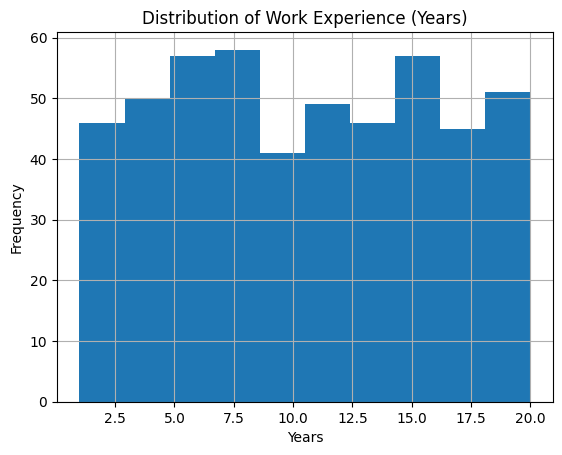

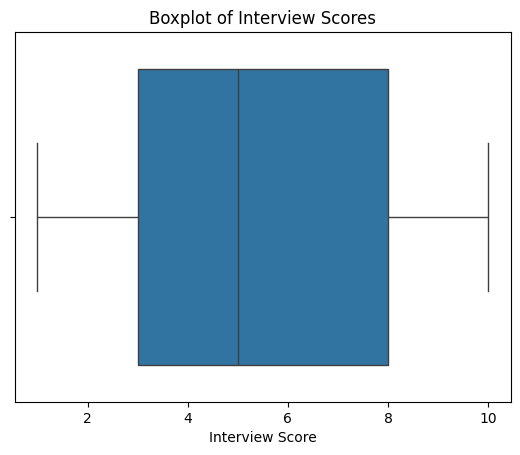

Interview Score
1     0.130
2     0.118
10    0.114
8     0.112
7     0.108
5     0.096
4     0.090
3     0.084
6     0.082
9     0.066
Name: proportion, dtype: float64


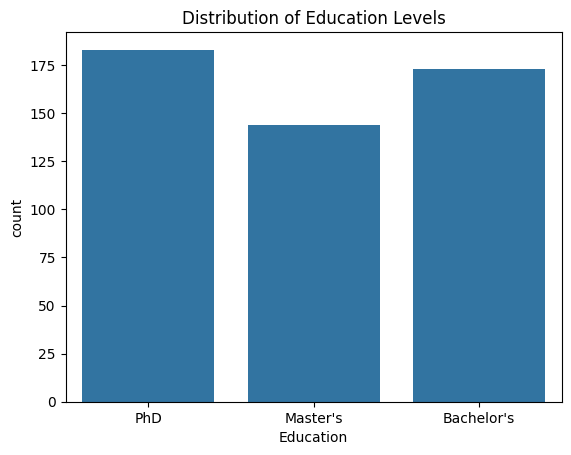

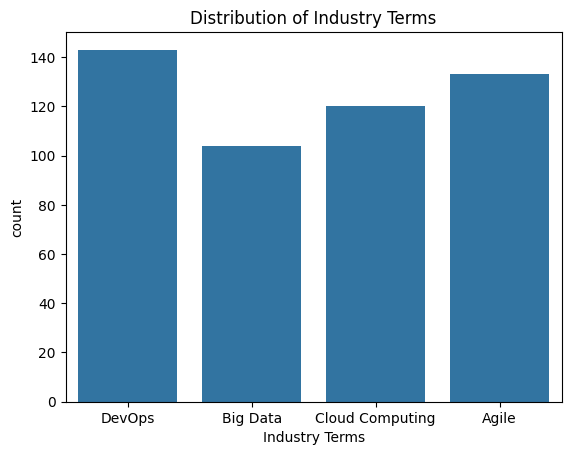

In [14]:
# Histogram for numeric columns
df['Work Experience (Years)'].hist(bins=10)
plt.title('Distribution of Work Experience (Years)')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

# Box plot for Interview Score
sns.boxplot(x=df['Interview Score'])
plt.title('Boxplot of Interview Scores')
plt.show()

print(df['Interview Score'].value_counts(normalize=True))

# Bar plot for categorical columns
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education Levels')
plt.show()

sns.countplot(x="Industry Terms", data=df)
plt.title('Distribution of Industry Terms')
plt.show()

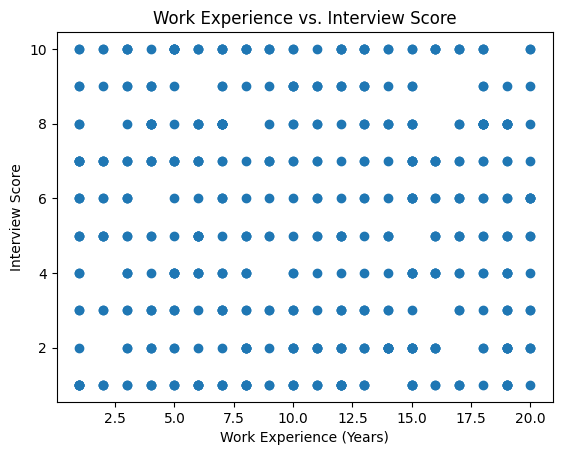

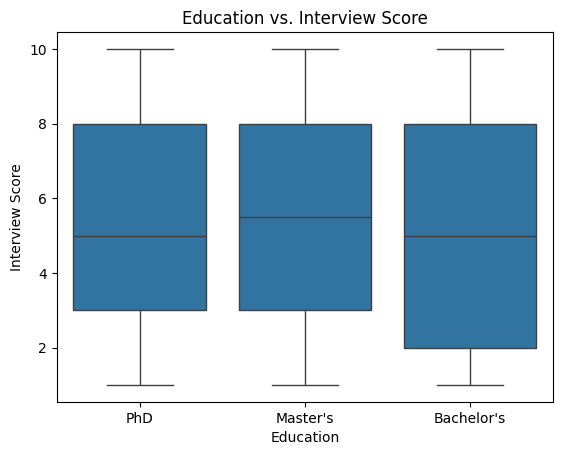

Hiring Decision,Hired,Not Hired
Education,,
Bachelor's,84,89
Master's,71,73
PhD,96,87


In [20]:
# Scatter plot for Work Experience (Years) vs. Interview Score
plt.scatter(df['Work Experience (Years)'], df['Interview Score'])
plt.title('Work Experience vs. Interview Score')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Interview Score')
plt.show()

# Box plot for Education vs. Interview Score
sns.boxplot(x='Education', y='Interview Score', data=df)
plt.title('Education vs. Interview Score')
plt.show()

# Cross-tabulation for Education vs. Hiring Decision
education_vs_hiring = pd.crosstab(df['Education'], df['Hiring Decision'])
education_vs_hiring

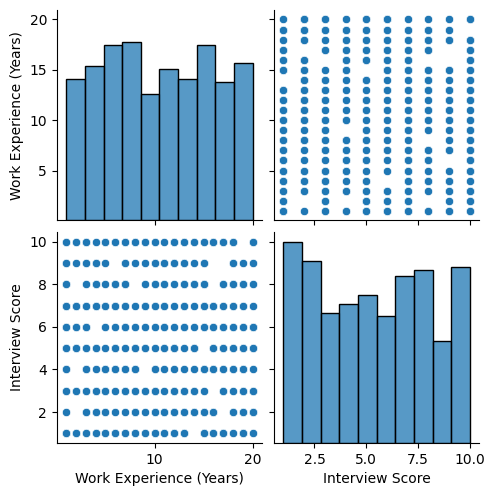

Experience Level Required,Entry-level,Mid-level,Senior-level
Education,,,
Bachelor's,5.553571,5.111111,4.851852
Master's,5.612245,5.409091,5.372549
PhD,5.508475,5.555556,5.157143


In [19]:
# Pair plot for numeric variables
sns.pairplot(df[['Work Experience (Years)', 'Interview Score', 'Education']])
plt.show()

# Pivot table for Education, Experience Level, and Hiring Decision
pivot_table = df.pivot_table(values='Interview Score', index='Education', columns='Experience Level Required', aggfunc='mean')
pivot_table

In [25]:
df.head(2)

,Education,Work Experience (Years),Skills,Certifications,Resume Keywords,Job Title,Required Skills,Experience Level Required,Industry Terms,Interview Score,Hiring Decision,Recruiter Notes
0,PhD,15,"Leadership, SQL, Machine Learning","Certified Data Scientist, PMP","Excel, Six Sigma Green Belt, PMP, Project Mana...",Project Manager,"Java, Python",Senior-level,DevOps,7,Hired,Needs more experience
1,Master's,11,"Project Management, Machine Learning, Java, Le...",NaN,"Machine Learning, PMP, Agile",Project Manager,"SQL, Python",Mid-level,Big Data,2,Hired,Good fit for the team


In [26]:
#Ordinal Encoding is used when the categorical variable has an inherent order
ordinal_encoder = OrdinalEncoder(categories=[["Bachelor's", "Master's", "PhD"]])
df['Education'] = ordinal_encoder.fit_transform(df[['Education']])

ordinal_encoder = OrdinalEncoder(categories=[["Entry-level", "Mid-level", "Senior-level"]])
df['Experience Level Required'] = ordinal_encoder.fit_transform(df[['Experience Level Required']])

#Label Encoding converts categorical values into integer codes. Each category is assigned a unique integer.
label_encoder = LabelEncoder()
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])

df.fillna({'Certifications': 'None'}, inplace=True)

# Binary Encoding for Hiring Decision
df["Hiring Decision"] = df["Hiring Decision"].apply(lambda x: 1 if x == "Hired" else 0)

df.head(2)

,Education,Work Experience (Years),Skills,Certifications,Resume Keywords,Job Title,Required Skills,Experience Level Required,Industry Terms,Interview Score,Hiring Decision,Recruiter Notes
0,2.0,15,"Leadership, SQL, Machine Learning","Certified Data Scientist, PMP","Excel, Six Sigma Green Belt, PMP, Project Mana...",2,"Java, Python",2.0,DevOps,7,1,Needs more experience
1,1.0,11,"Project Management, Machine Learning, Java, Le...",None,"Machine Learning, PMP, Agile",2,"SQL, Python",1.0,Big Data,2,1,Good fit for the team
